In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data= pd.DataFrame()

for a in assets:
    pf_data[a]= wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2019-11-15,120.540001,3120.459961
2019-11-18,121.889999,3122.030029
2019-11-19,121.419998,3120.179932
2019-11-20,122.290001,3108.459961
2019-11-21,120.339996,3103.540039


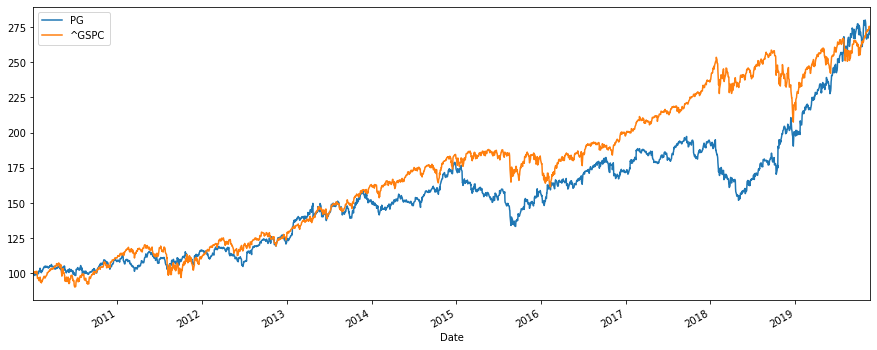

In [4]:
#Normalize to 100
(pf_data/pf_data.iloc[0]*100).plot(figsize=(15,6));

In [5]:
log_returns= np.log(pf_data/pf_data.shift(1))

In [6]:
log_returns.mean()*250

PG       0.099661
^GSPC    0.101214
dtype: float64

In [7]:
log_returns.cov()*250

,PG,^GSPC
PG,0.021851,0.011401
^GSPC,0.011401,0.021873


In [8]:
log_returns.corr()

,PG,^GSPC
PG,1.00000,0.52151
^GSPC,0.52151,1.00000


In [9]:
num_assets = len(assets)

In [10]:
num_assets

2

In [11]:
weights = np.random.random(2)

In [13]:
weights/=np.sum(weights)

In [14]:
weights

array([0.14286346, 0.85713654])

In [15]:
weights[0]+weights[1]

1.0

## Expected Porfolio Return:

In [17]:
np.sum(weights*log_returns.mean())*250

0.10099186611441013

## Expected Porfolio Variance:

In [19]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.019307797470852893

## Expected Portfolio Volatility:

In [20]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.13895250077221674

In [30]:
pfolio_returns=[]
pfolio_vols=[]

for x in range(1000):
    weights=np.random.random(num_assets)
    weights /=np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean()*250))
    pfolio_vols.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_vols = np.array(pfolio_vols)

pfolio_returns, pfolio_vols

(array([0.10058291, 0.10052261, 0.10024221, 0.09970087, 0.09985176,
        0.10058564, 0.10049939, 0.10057878, 0.10049671, 0.10049777,
        0.1004933 , 0.10066373, 0.10011554, 0.10011432, 0.10061812,
        0.10099207, 0.10043391, 0.10036625, 0.10067199, 0.10086894,
        0.10096162, 0.10030848, 0.10097014, 0.10028705, 0.10050302,
        0.10046897, 0.10022985, 0.10040688, 0.09987154, 0.1006591 ,
        0.1004245 , 0.10055492, 0.10080577, 0.10012344, 0.09999032,
        0.10051616, 0.10065007, 0.10097033, 0.10095323, 0.10042984,
        0.1003362 , 0.10097644, 0.10027491, 0.10030209, 0.100082  ,
        0.10039484, 0.10052046, 0.1000214 , 0.10012714, 0.10040618,
        0.10076336, 0.10029563, 0.10011367, 0.09989556, 0.10029837,
        0.10075105, 0.10046553, 0.10120401, 0.09972211, 0.10048837,
        0.10049764, 0.10058768, 0.10067858, 0.1006585 , 0.10066618,
        0.10031308, 0.10071898, 0.10084104, 0.10102271, 0.10050677,
        0.1003247 , 0.10047945, 0.10014236, 0.10

## Graph:

In [31]:
portfolios = pd.DataFrame({'Returns':pfolio_returns, 'Volatility': pfolio_vols})

In [32]:
portfolios.head(5)

,Returns,Volatility
0,0.100583,0.129682
1,0.100523,0.129212
2,0.100242,0.130229
3,0.099701,0.146048
4,0.099852,0.140001


In [33]:
portfolios.tail(5)

,Returns,Volatility
995,0.099864,0.139560
996,0.100167,0.131385
997,0.099760,0.143540
998,0.100791,0.133119
999,0.101083,0.142321


Text(0, 0.5, 'Expected Returns')

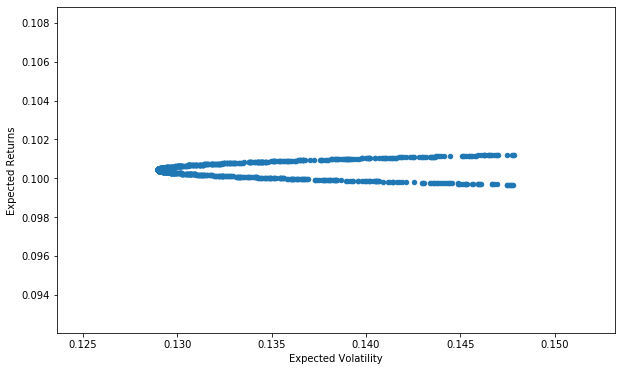

In [34]:
portfolios.plot(x='Volatility', y='Returns', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')